In [1]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/weekly_degree/"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

In [4]:
def extractorWeek(year):
    return(int(str(year)[4:]))

In [7]:
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [8]:
frame

,Year_no,Week_no,SenderId,TargetCount,Sum_Amount
0,2020,43,277134,2,6010000000
1,2021,19,1415085,1,103620000
2,2022,18,1940083,6,1000000
3,2020,33,715797,5,2132658179
4,2021,21,1482677,2,100000000
...,...,...,...,...,...
3045209,2022,30,1839622,1,80000000
3045210,2022,2,2371288,1,2100000
3045211,2022,24,2634411,1,4000000
3045212,2022,31,2895292,1,7822000


In [22]:
frame["year"]=frame.Year_no	
frame["week"]=frame.Week_no

In [23]:
# frame["year"]=frame.time_week.apply(extractorYear)
# frame["week"]=frame.time_week.apply(extractorWeek)
final = frame.sort_values(by=['year','week'])

In [28]:
extra = final[((final.year == 2018) & (final.week < 26)) | ((final.year == 2022) & (final.week > 34))]
df = pd.merge(final, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

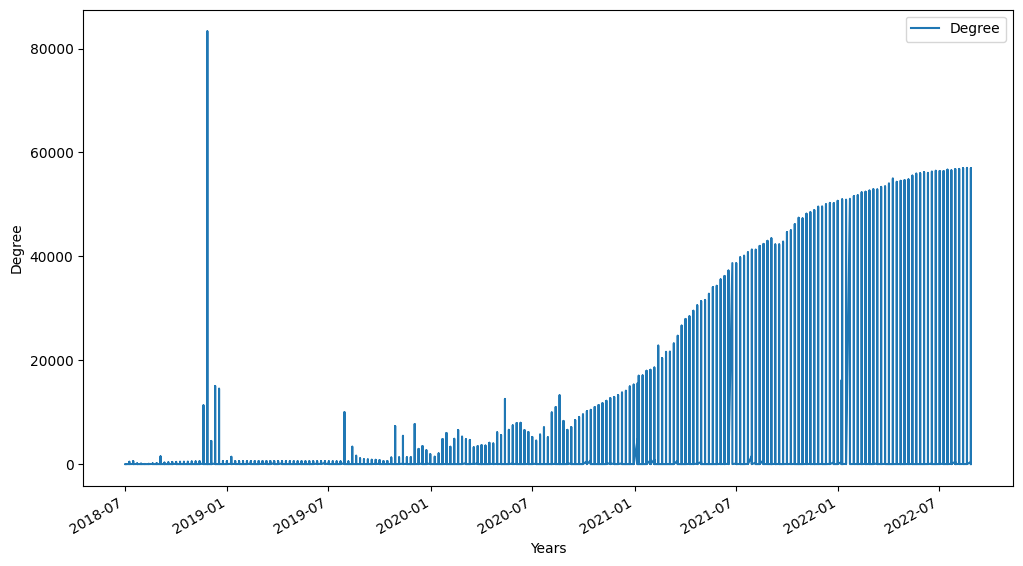

In [30]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='TargetCount', ax=ax, figsize=(12,7))
ax.set_xlabel('Years')
ax.set_ylabel('Degree')
ax.legend(['Degree'])

In [24]:
final

,Year_no,Week_no,SenderId,TargetCount,Sum_Amount,year,week
4002,2018,1,23518,49,152970000,2018,1
4003,2018,1,40514,1,149998000,2018,1
114542,2018,1,254280,1,15462983204,2018,1
119866,2018,1,255349,1,3198580,2018,1
141521,2018,1,22484,1,5724049,2018,1
...,...,...,...,...,...,...,...
3044363,2022,52,1486087,1,1933597,2022,52
3044525,2022,52,2309860,1,3094318,2022,52
3044555,2022,52,1981096,1,10000,2022,52
3044654,2022,52,2275071,1,625000,2022,52


<AxesSubplot: xlabel='date'>

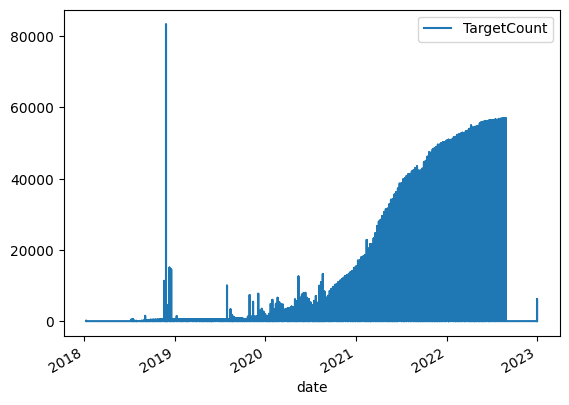

In [26]:
# Determine the date
final['date'] = pd.to_datetime(final.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(final.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
final.plot(x='date', y='TargetCount', ax=ax)